In [2]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

In [99]:
data_file = open("yelp_academic_dataset_business.json", encoding="utf8")
data = []
for line in data_file:
    data.append(json.loads(line))
business_df = pd.DataFrame(data)
data_file.close()


data_file = open("yelp_academic_dataset_review.json", encoding="utf8")
data = []
for line in data_file:
    data.append(json.loads(line))
review_df = pd.DataFrame(data)
data_file.close()

data_file = open("yelp_academic_dataset_user.json", encoding="utf8")
data = []
for line in data_file:
    data.append(json.loads(line))
user_df = pd.DataFrame(data)
data_file.close()

data_file = open("yelp_academic_dataset_checkin.json", encoding="utf8")
data = []
for line in data_file:
    data.append(json.loads(line))
checkin_df = pd.DataFrame(data)
data_file.close()

data_file = open("yelp_academic_dataset_tip.json", encoding="utf8")
data = []
for line in data_file:
    data.append(json.loads(line))
tip_df = pd.DataFrame(data)
data_file.close()

In [100]:
print('Business columns:\n', business_df.columns, '\n\n Review columns:\n', review_df.columns, '\n\n User columns:\n', user_df.columns,  '\n\n Checkin columns:\n', checkin_df.columns,  '\n\n Tip columns:\n', tip_df.columns)

Business columns:
 Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object') 

 Review columns:
 Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object') 

 User columns:
 Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object') 

 Checkin columns:
 Index(['business_id', 'date'], dtype='object') 

 Tip columns:
 Index(['user_id', 'business_id', 'text', 'date', 'compliment_count'], dtype='object')


In [101]:
business_df[:5]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [102]:
review_df[:5]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [103]:
user_df[:5]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [104]:
checkin_df[:5]

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [105]:
tip_df[:5]

,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


In [106]:
## Left joining the review df with users df to return only those reviews with corresponding user_ids

#reviews_with_users_df = pd.merge(review_df, user_df, on='user_id', how='left') #commented out so it doesn't run unnecessarily
#reviews_with_users_df[:5] #commented out so it doesn't run unnecessarily

,review_id,user_id,business_id,stars,useful_x,funny_x,cool_x,text,date,name,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,Melanie,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,Erin,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,Debra,...,14.0,3.0,1.0,1.0,63.0,96.0,86.0,86.0,49.0,27.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,Kyle,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,Sophia,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0


In [107]:
## This indicates there are no orphaned reviews - those with text but no corresponding user in the data

#reviews_with_users_df.shape[0] == review_df.shape[0] #commented out so it doesn't run unnecessarily


True

In [108]:
## Aggregating the date to day for visualization ease
review_df['day'] = review_df.date.apply(lambda row: row[:10])
## Convert new column from string to datetime, along with original date column
review_df.day = pd.to_datetime(review_df.day)
review_df.date = pd.to_datetime(review_df.date)
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018-07-07
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012-01-03
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014-02-05
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015-01-04
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017-01-14
...,...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2014-12-17
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2021-03-31
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2019-12-30
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2022-01-19


In [109]:
print('The oldest review is from:', review_df.date.min(), '\nThe most recent review is from:', review_df.date.max())
review_df.date.describe()

The oldest review is from: 2005-02-16 03:23:22 
The most recent review is from: 2022-01-19 19:48:45


<ipython-input-109-fccc21339d76>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  review_df.date.describe()


count                 6990280
unique                6885665
top       2014-04-14 09:19:21
freq                        8
first     2005-02-16 03:23:22
last      2022-01-19 19:48:45
Name: date, dtype: object

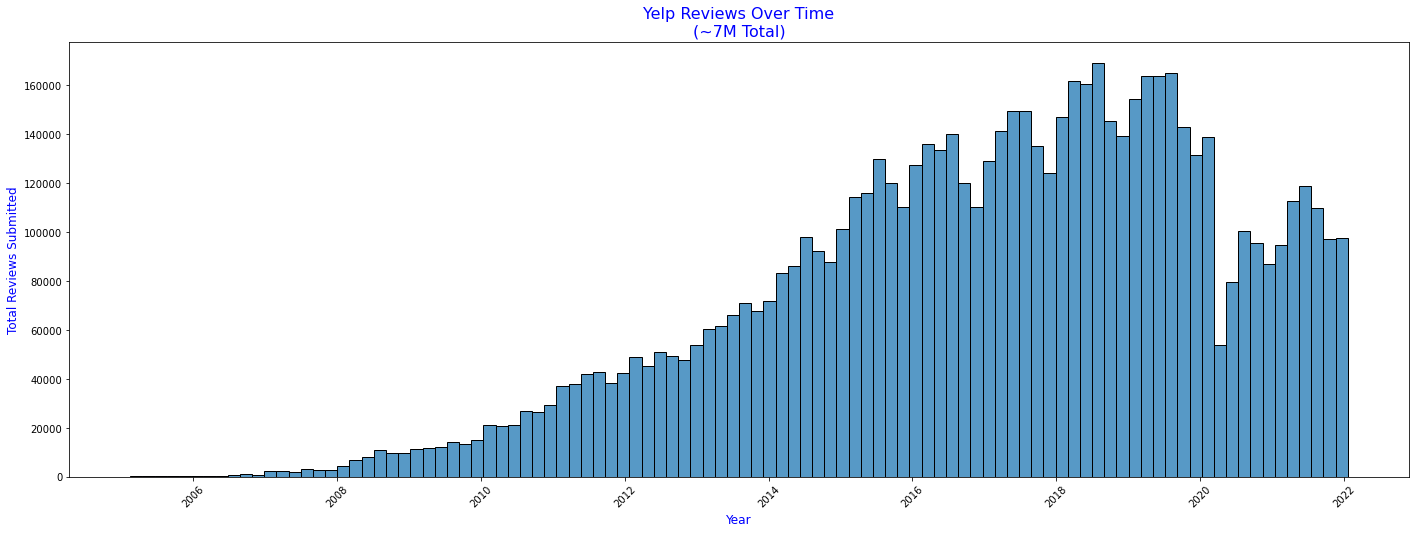

In [110]:
## Visualize reviews over time

fig, ax = plt.subplots(figsize=(24, 8))
sns.histplot(data=review_df, x='day', bins=100)

plt.title('Yelp Reviews Over Time\n(~7M Total)', color='b', size=16)
ax.set_ylabel('Total Reviews Submitted', color='b', size=12)
ax.set_xlabel('Year', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

In [111]:
## Note the below became unnecessary when casting the date columns as datetime improved processing

# ## Sampling down the review df to make visualization manageable
# sampled_review_df = review_df.sample(6990280)
# ## Aggregating the date to day for visualization ease
# sampled_review_df['day'] = sampled_review_df.date.apply(lambda row: row[:10])
# ## Convert new column from string to datetime
# sampled_review_df.day = pd.to_datetime(sampled_review_df.day)
# sampled_review_df

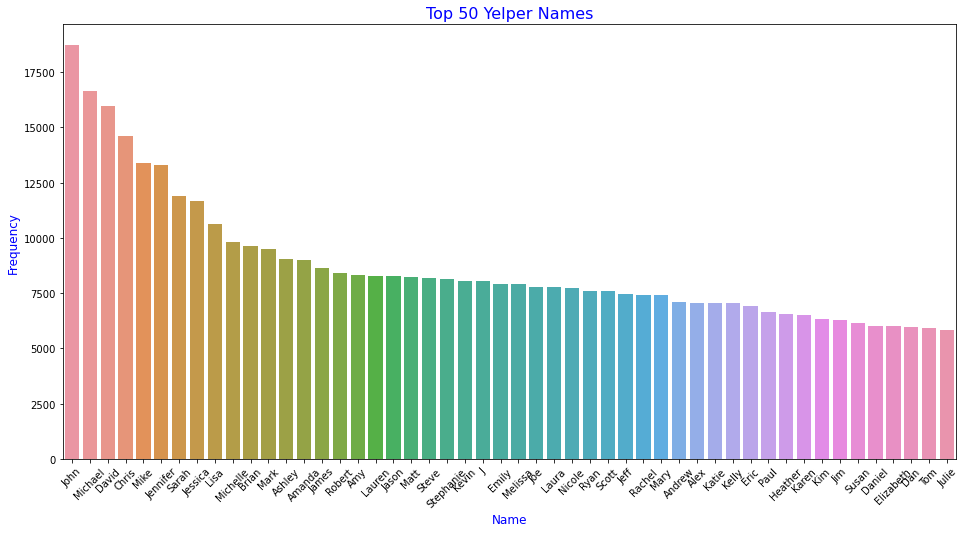

In [112]:
## Create data for top N names visual
popular_names_dict = {'name': user_df['name'].value_counts().head(50).index, 'frequency':user_df['name'].value_counts().head(50)}
popular_names_df = pd.DataFrame.from_dict(popular_names_dict)
popular_names_df

## Create visual
fig, ax = plt.subplots(figsize=(16, 8))
sns.barplot(data=popular_names_df, x='name', y='frequency')

plt.title('Top 50 Yelper Names', color='b', size=16)
ax.set_ylabel('Frequency', color='b', size=12)
ax.set_xlabel('Name', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

In [113]:
business_df.city.value_counts()

Philadelphia    14569
Tucson           9250
Tampa            9050
Indianapolis     7540
Nashville        6971
                ...  
Delaware            1
frazer              1
NEWARK              1
McCarran            1
Palm harbor         1
Name: city, Length: 1416, dtype: int64

In [114]:
## Aggregating the date to day for visualization ease
user_df.yelping_since = user_df.yelping_since.apply(lambda row: row[:10])
## Convert new column from string to datetime, along with original date column
user_df.yelping_since = pd.to_datetime(user_df.yelping_since)

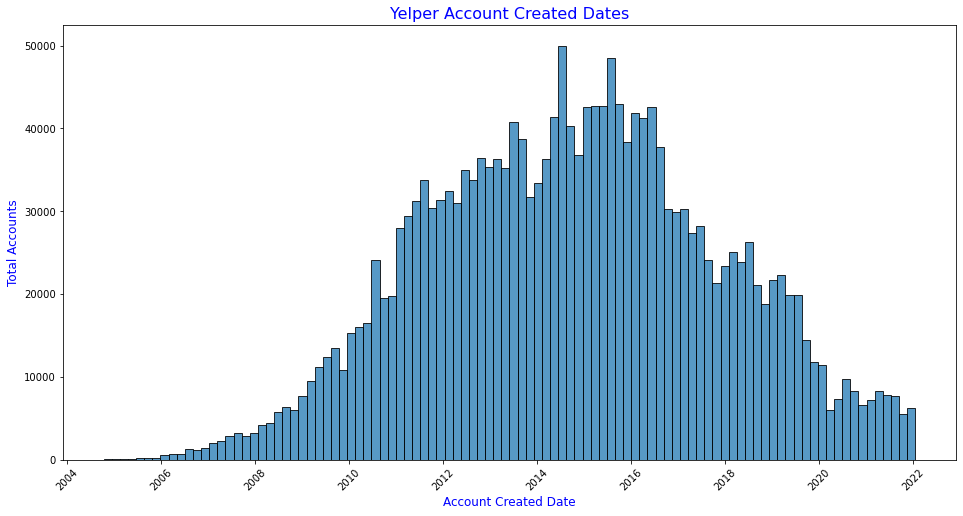

In [115]:
## Visualize yelper age over time

fig, ax = plt.subplots(figsize=(16, 8))
sns.histplot(data=user_df, x='yelping_since', bins=100)

plt.title('Yelper Account Created Dates', color='b', size=16)
ax.set_ylabel('Total Accounts', color='b', size=12)
ax.set_xlabel('Account Created Date', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

In [116]:
## Create an hour column to visualize the most frequent review times around the day
review_df['hour'] = review_df.date.apply(lambda row: row.hour)

## The below didn't work - gives negative hours lol. Need to find a timezone conversion function, which will be easier
#review_df['hour_eastern'] = review_df.date.apply(lambda row: row.hour - 4) #commented out so it doesn't run unnecessarily
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,hour
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018-07-07,22
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012-01-03,15
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014-02-05,20
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015-01-04,0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017-01-14,20
...,...,...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2014-12-17,21
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2021-03-31,16
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2019-12-30,3
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2022-01-19,18


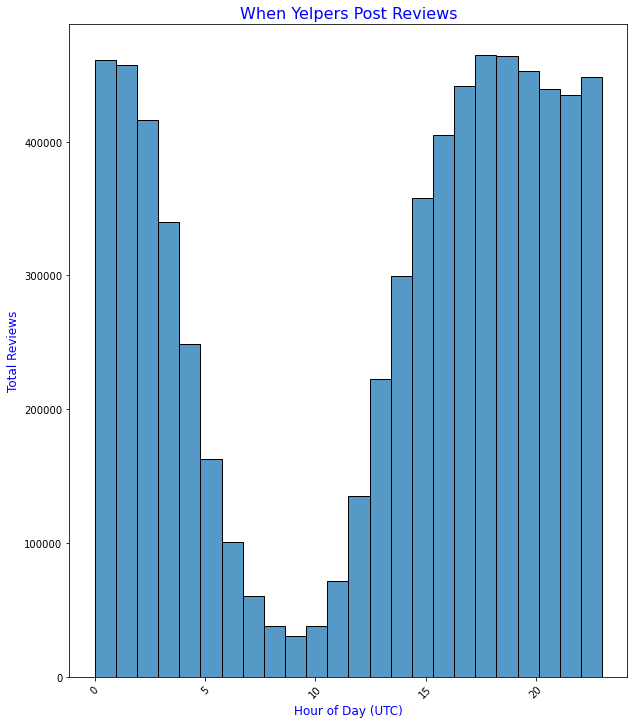

In [117]:
## Visualize yelper age over time

fig, ax = plt.subplots(figsize=(10, 12))
sns.histplot(data=review_df, x='hour', bins=24)

plt.title('When Yelpers Post Reviews', color='b', size=16)
ax.set_ylabel('Total Reviews', color='b', size=12)
ax.set_xlabel('Hour of Day (UTC)', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

In [118]:
## Create a column with review length metric
review_df['review_length']= review_df.text.apply(lambda row: len(row))
review_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,hour,review_length
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,2018-07-07,22,513
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,2012-01-03,15,829
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,2014-02-05,20,339
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,2015-01-04,0,243
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,2017-01-14,20,534
...,...,...,...,...,...,...,...,...,...,...,...,...
6990275,H0RIamZu0B0Ei0P4aeh3sQ,qskILQ3k0I_qcCMI-k6_QQ,jals67o91gcrD4DC81Vk6w,5.0,1,2,1,Latest addition to services from ICCU is Apple...,2014-12-17 21:45:20,2014-12-17,21,322
6990276,shTPgbgdwTHSuU67mGCmZQ,Zo0th2m8Ez4gLSbHftiQvg,2vLksaMmSEcGbjI5gywpZA,5.0,2,1,2,"This spot offers a great, affordable east week...",2021-03-31 16:55:10,2021-03-31,16,397
6990277,YNfNhgZlaaCO5Q_YJR4rEw,mm6E4FbCMwJmb7kPDZ5v2Q,R1khUUxidqfaJmcpmGd4aw,4.0,1,0,0,This Home Depot won me over when I needed to g...,2019-12-30 03:56:30,2019-12-30,3,467
6990278,i-I4ZOhoX70Nw5H0FwrQUA,YwAMC-jvZ1fvEUum6QkEkw,Rr9kKArrMhSLVE9a53q-aA,5.0,1,0,0,For when I'm feeling like ignoring my calorie-...,2022-01-19 18:59:27,2022-01-19,18,2317


In [119]:
## Average review seems to be ~2 tweets (280 characters * 2)
review_df.review_length.describe()

count    6.990280e+06
mean     5.677644e+02
std      5.272578e+02
min      1.000000e+00
25%      2.290000e+02
50%      4.060000e+02
75%      7.200000e+02
max      5.000000e+03
Name: review_length, dtype: float64

In [120]:
## Share of entries that will be truncated in a BERT model
print(np.round(((np.sum(review_df.review_length > 512) / 6990280) * 100), 2), '% of submissions are greater than 512 characters in length.')

39.27 % of submissions are greater than 512 characters in length.


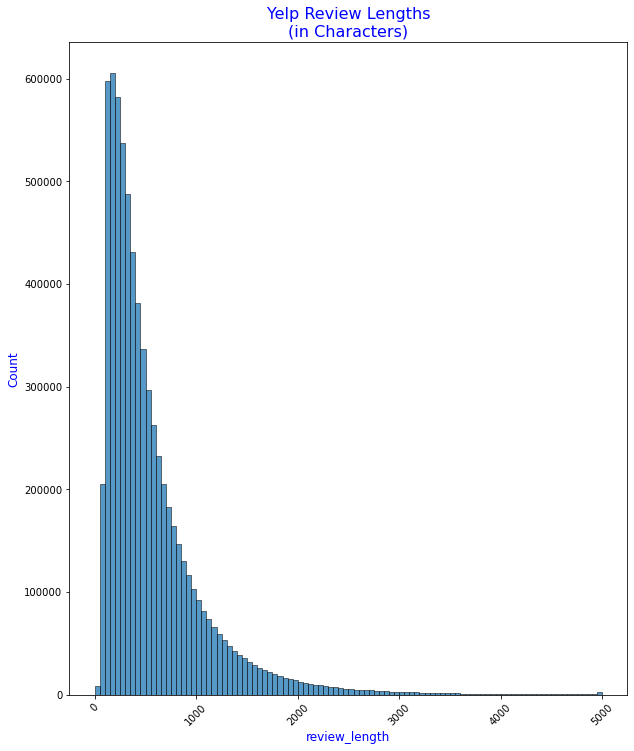

In [121]:
## Visualize review lengths

fig, ax = plt.subplots(figsize=(10, 12))
sns.histplot(data=review_df, x=review_df.review_length, bins=100)

plt.title('Yelp Review Lengths\n(in Characters)', color='b', size=16)
ax.set_ylabel('Count', color='b', size=12)
ax.set_xlabel('review_length', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

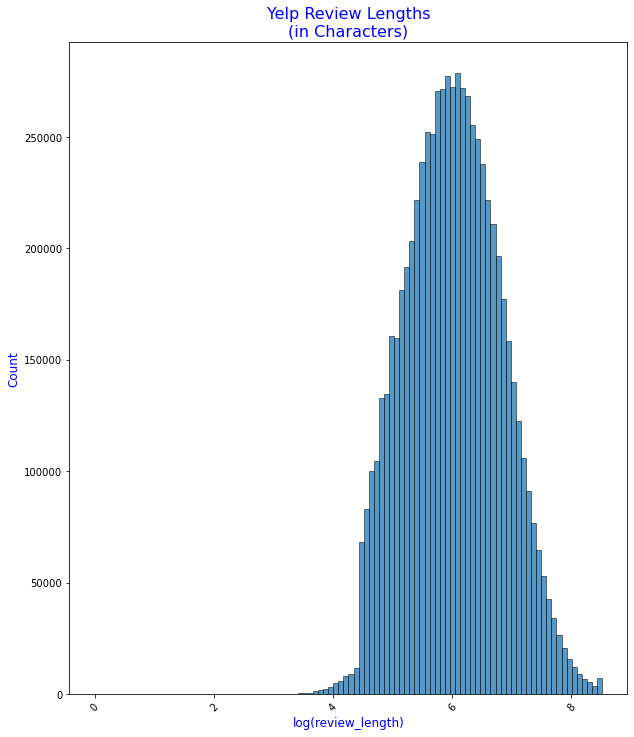

In [122]:
## Visualize yelper age over time

fig, ax = plt.subplots(figsize=(10, 12))
sns.histplot(data=review_df, x=np.log(review_df.review_length), bins=100)

plt.title('Yelp Review Lengths\n(in Characters)', color='b', size=16)
ax.set_ylabel('Count', color='b', size=12)
ax.set_xlabel('log(review_length)', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

In [244]:
## In order to guess at who "locals" are, we need to understand the share of reviews in various locations. 
## I'll attempt to create a count for each user of reviews by location to use later for this purpose

# Sample down the size to work more efficiently
sampled_user_df = user_df.sample(10000)
sampled_user_df[:2]

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
541772,RF-tTJIn9x4QkJL92tzrIA,Lily,1,2019-06-16,0,0,0,,None,0,...,0,0,0,0,0,0,0,0,0,0
1815174,CLtry9CIdnCcA6fvFBx_Dw,Nicole,15,2009-07-10,7,1,4,,"5gJUVNMXcb1y7EO6zO2bgQ, fCm-9cgoYMlrgOYTn41oYA...",0,...,0,0,0,0,0,0,0,0,0,0


In [216]:
user_df.review_count.describe()

count    1.987897e+06
mean     2.339441e+01
std      8.256699e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.700000e+01
max      1.747300e+04
Name: review_count, dtype: float64

In [217]:
## Checking to see if all user reviews are contained in the review data
# Expect 135 reviews for user MfLgwyk_6C853bbNxwGoUQ, but returns only 7
review_df[review_df.user_id == 'MfLgwyk_6C853bbNxwGoUQ']

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,day,hour,review_length
12289,JrYfW2Wq6IwsDsKITg1bAQ,MfLgwyk_6C853bbNxwGoUQ,W4ZEKkva9HpAdZG88juwyQ,3.0,1,0,0,Slow service but friendly staff. Customized ve...,2013-12-07 20:06:23,2013-12-07,20,298
1601543,QJhOgZx-pekOEjLsPHXmAw,MfLgwyk_6C853bbNxwGoUQ,NB5XTBuLVCn7c9Lu5SUqKg,5.0,1,0,0,This is one of my most favorite Indian fine di...,2016-11-30 04:38:43,2016-11-30,4,476
2163259,qTxKwtE_YcxQQLUl372v9A,MfLgwyk_6C853bbNxwGoUQ,EagkHaaC-kUozD3MPzbRIw,3.0,0,0,0,Overrated. 180$ for 6 people? And not the bes...,2013-12-08 23:05:17,2013-12-08,23,206
3603750,rx6nvfRIIBVZogF0qAZb7w,MfLgwyk_6C853bbNxwGoUQ,XjjgJb0iyG33CQp4ehnRGQ,3.0,2,1,1,The people here are lovely. They make you feel...,2015-02-19 15:27:48,2015-02-19,15,608
4313568,OI1JYWf5la-qDF49IBihmQ,MfLgwyk_6C853bbNxwGoUQ,z3jfgtlDBww3jTPLosPeew,5.0,3,0,0,Do yourself favor and go there right now. And...,2014-11-03 20:27:08,2014-11-03,20,685
5597274,W1shn_2Z_Qo5Cd-unb6Maw,MfLgwyk_6C853bbNxwGoUQ,WXgV2lOUgas7DzTLeDau-w,5.0,0,0,1,Awesome food. Worth the one hour wait. We lov...,2013-12-08 05:01:05,2013-12-08,5,589
6351812,8biRIBpWzE0yHyrCjI0c-w,MfLgwyk_6C853bbNxwGoUQ,X7yGrz7oDbt8UY5rdmJc_w,3.0,1,0,1,I had gone there with high expectations after ...,2014-11-12 18:47:44,2014-11-12,18,344


In [245]:
## Working on a function to return a dictionary of the cities each user reviewed in

## Commenting out below - took about 90 mins to run on a sample of 10000
# user_cities = []
# for sampled_user in sampled_user_df.user_id:
#     cities = []
#     for biz_id in review_df.business_id[review_df.user_id == sampled_user]:
#         cities.append(business_df.city[business_df.business_id == biz_id].values[0])
#     user_cities.append((sampled_user, Counter(cities)))
# user_cities

[('RF-tTJIn9x4QkJL92tzrIA', Counter({'Philadelphia': 1})),
 ('CLtry9CIdnCcA6fvFBx_Dw', Counter({'Smyrna': 1})),
 ('tIJzwEr_0VUuA1HqTljtHA', Counter({'Newark': 1})),
 ('99WyFNdljeQ8HtoZcc_02A', Counter({'Santa Barbara': 3})),
 ('PYXphKUmCrduriI18VnGkg',
  Counter({'Alton': 1, 'Souderton': 1, 'Antioch': 1})),
 ('pELbDPHVhLHnmPmLocITwg', Counter({'Phoenixville': 1})),
 ('BK0brzZFitqDKl73ademYw',
  Counter({'St Pete Beach': 1, 'Treasure Island': 1})),
 ('ECpBIdAVta8Q9soW1yinfw', Counter({'Philadelphia': 1})),
 ('Q81ZTani0UsxOwP4bYxCZw', Counter({'Nashville': 1})),
 ('dc_yqHZb3jrKdb_X2qf6CQ', Counter({'Franklin': 6, 'Nashville': 1})),
 ('s8AfUSS3wfTKzkLgUjr82w', Counter({'Tampa': 1})),
 ('0GWZTwX8HyKYWvkhnl-PDg',
  Counter({'Springfield': 1, 'Clifton Heights': 1, 'Philadelphia': 1})),
 ('vWOUT0no7Z_8sOsUDPZyyw', Counter({'Indianapolis': 1})),
 ('JxyvMjLmOOwWMqseGMSv5A', Counter({'Gulfport': 1})),
 ('tdBuQRkd07jEmNZvz-NbTw', Counter({'Santa Barbara': 5})),
 ('uPKaZGg7wt4ff8rVE1_muQ', Counter

In [246]:
#print(user_cities[1][1].most_common(1)[0][1])
#print(sum(user_cities[1][1].values()))
#?Counter
c=0
top_cities = []
top_city_reviews_by_user = []
total_reviews_by_user = []
top_city_percentage_by_user = []
local_user_data = []
for i in user_cities:
    user = i[0]
    top_city = user_cities[c][1].most_common(1)[0][0]
    top_cities.append(top_city)
    top_city_reviews = user_cities[c][1].most_common(1)[0][1]
    top_city_reviews_by_user.append(top_city_reviews)
    total_reviews = sum(user_cities[c][1].values())
    total_reviews_by_user.append(total_reviews)
    percentage_top_city = top_city_reviews/total_reviews
    top_city_percentage_by_user.append(percentage_top_city)
    local_user_data.append([user, top_city, top_city_reviews, total_reviews, percentage_top_city])
    #sampled_user_df[sampled_user_df.user_id == user][] = 
    c+=1


In [241]:
c=0
print(local_user_data[c])

['KgdavHgCj-VgX9N7j2Y-9A', 'Exton', 1, 1, 1.0]


In [247]:
sampled_user_df['top_cities'] = top_cities
sampled_user_df['top_city_reviews_by_user'] = top_city_reviews_by_user
sampled_user_df['total_reviews_by_user'] = total_reviews_by_user
sampled_user_df['top_city_percentage_by_user'] = top_city_percentage_by_user
sampled_user_df['local_user_data'] = local_user_data
sampled_user_df

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,top_cities,top_city_reviews_by_user,total_reviews_by_user,top_city_percentage_by_user,local_user_data
541772,RF-tTJIn9x4QkJL92tzrIA,Lily,1,2019-06-16,0,0,0,,None,0,...,0,0,0,0,0,Philadelphia,1,1,1.000000,"[RF-tTJIn9x4QkJL92tzrIA, Philadelphia, 1, 1, 1.0]"
1815174,CLtry9CIdnCcA6fvFBx_Dw,Nicole,15,2009-07-10,7,1,4,,"5gJUVNMXcb1y7EO6zO2bgQ, fCm-9cgoYMlrgOYTn41oYA...",0,...,0,0,0,0,0,Smyrna,1,1,1.000000,"[CLtry9CIdnCcA6fvFBx_Dw, Smyrna, 1, 1, 1.0]"
736341,tIJzwEr_0VUuA1HqTljtHA,J.,5,2019-07-29,6,0,1,,None,0,...,0,0,0,0,0,Newark,1,1,1.000000,"[tIJzwEr_0VUuA1HqTljtHA, Newark, 1, 1, 1.0]"
141000,99WyFNdljeQ8HtoZcc_02A,Everett,11,2015-08-18,8,9,11,,None,5,...,0,0,0,0,0,Santa Barbara,3,3,1.000000,"[99WyFNdljeQ8HtoZcc_02A, Santa Barbara, 3, 3, ..."
415961,PYXphKUmCrduriI18VnGkg,Al,229,2009-10-21,260,58,89,"2015,2016,2017,2019,20,20,2021","L8_dboxkrvi3LbPeAh8UVg, GB1wNOUbzMkI4kwoh2DtAQ...",9,...,10,5,5,2,1,Alton,1,3,0.333333,"[PYXphKUmCrduriI18VnGkg, Alton, 1, 3, 0.333333..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39938,4UAqdgiCe1jwI1IQl96MIA,Gabriela,573,2008-12-15,1576,587,281,,"84HvpQDxcHWmbMDfs8IEYw, vmcqAzBJLDYNFbW-n1fMAg...",26,...,31,10,10,10,2,Philadelphia,300,330,0.909091,"[4UAqdgiCe1jwI1IQl96MIA, Philadelphia, 300, 33..."
1881230,1i0-ZdeilcuntcqGh-vICg,Derek,2,2010-03-20,4,0,0,,xQLy_wpqrR3etSXt61OIIg,0,...,0,0,0,0,0,Richmond Heights,1,1,1.000000,"[1i0-ZdeilcuntcqGh-vICg, Richmond Heights, 1, ..."
1878617,9rLMu0uyWdDrGaDAk46DlQ,Craig,11,2016-03-25,3,0,1,,"LnIqtiv31qUKBST4riwULQ, 4DMShbQZFQsSxMBf0PBQsA...",1,...,0,0,0,0,0,Santa Barbara,1,1,1.000000,"[9rLMu0uyWdDrGaDAk46DlQ, Santa Barbara, 1, 1, ..."
435611,ibje04ah8dQNTQ5S897ekg,Mark,3,2017-01-23,2,0,2,,"WlmM_N2FXSu6a2RYPeDS0w, IJFO0KYccgn9S9B_As68MQ...",0,...,1,0,0,0,0,New Orleans,1,1,1.000000,"[ibje04ah8dQNTQ5S897ekg, New Orleans, 1, 1, 1.0]"


In [248]:
## Write results to csv
#sampled_user_df.to_csv('sampled_user_df.csv') #commenting out so it doesn't run unnecessarily

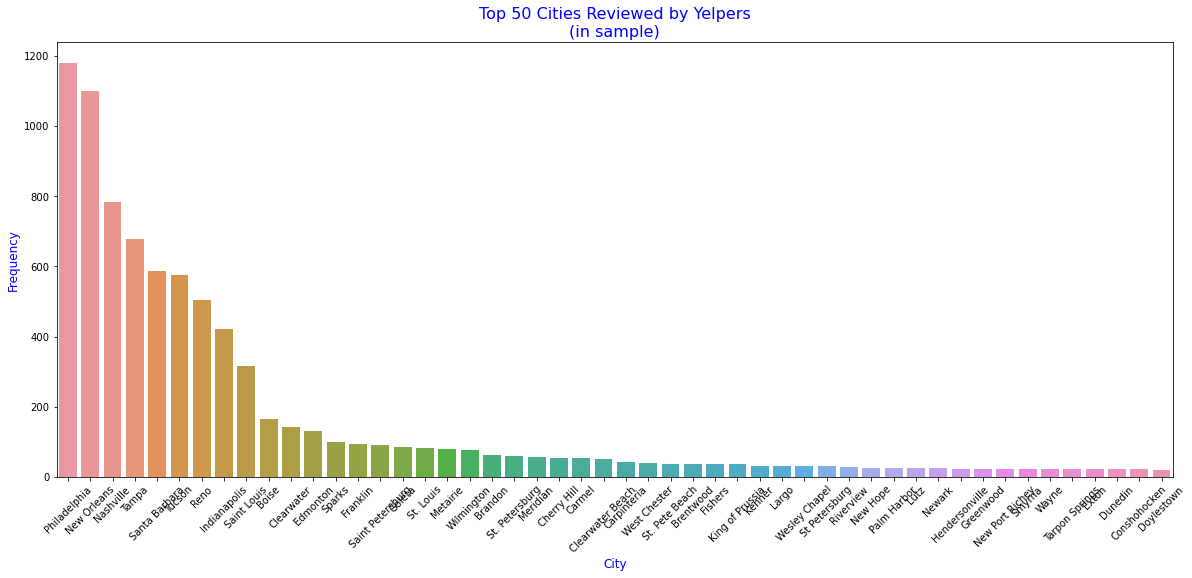

In [12]:
## Visualize the pareto of top-reviewed cities from the data
stored_sampled_user_df = pd.read_csv("sampled_user_df.csv") # read in the sample df from storage

## Create data for top N cities visual
popular_cities_dict = {'top_cities': stored_sampled_user_df['top_cities'].value_counts().head(50).index, 'frequency':stored_sampled_user_df['top_cities'].value_counts().head(50)}
popular_cities_df = pd.DataFrame.from_dict(popular_cities_dict)
popular_cities_df

## Create visual
fig, ax = plt.subplots(figsize=(20, 8))
sns.barplot(data=popular_cities_df, x='top_cities', y='frequency')

plt.title('Top 50 Cities Reviewed by Yelpers\n(in sample)', color='b', size=16)
ax.set_ylabel('Frequency', color='b', size=12)
ax.set_xlabel('City', color='b', size=12)

plt.xticks(rotation=45)

plt.show()

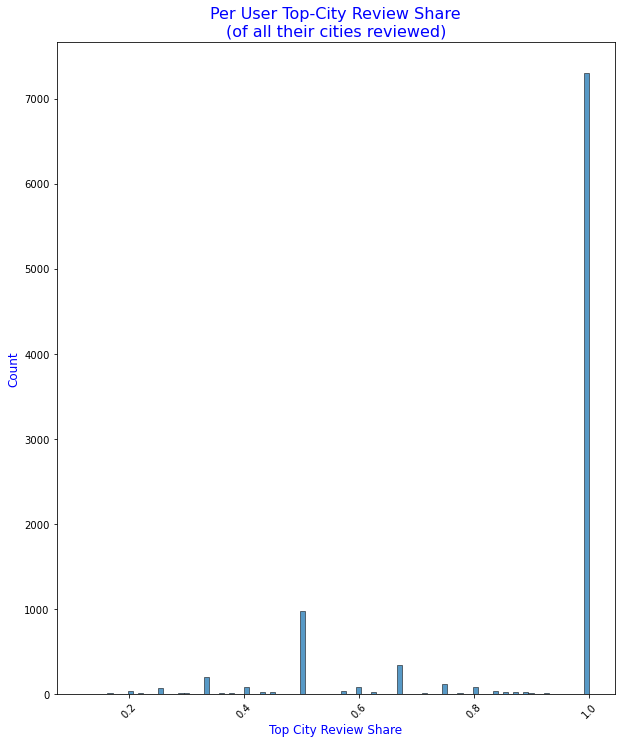

In [4]:
## Visualize the percentages for each user from the csv file written from above cells

fig, ax = plt.subplots(figsize=(10, 12))
sns.histplot(data=stored_sampled_user_df, x=stored_sampled_user_df.top_city_percentage_by_user, bins=100)

plt.title('Per User Top-City Review Share\n(of all their cities reviewed)', color='b', size=16)
ax.set_ylabel('Count', color='b', size=12)
ax.set_xlabel('Top City Review Share', color='b', size=12)

plt.xticks(rotation=45)

plt.show()


In [221]:
## Work in progress - see above 

# def append_cities(user_ids):
#     """Takes in user_ids from the given dataframe and 
#     appends a dictionary of the cities they've reviewed 
#     businesses in."""

#     for user_id in user_ids:
#         cities = []
#         print(user_id)
#         for biz_id in review_df.business_id[review_df.user_id == user_id]:
#             cities.append(business_df.city[business_df.business_id == biz_id].values[0])
    
#     return(Counter(cities))

# append_cities(sampled_user_df.user_id[:5])